<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Regression_Regularization_RidgeLassoElasticNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regularization and Hypertunning Techniques in Regression

1. Lasso Regression- L1 Regularization
2. Ridge Regression- L2 Regularization
3. Elastic Net Regression - L1 L2 Regularization


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,ElasticNetCV

In [2]:
df=pd.read_csv('/content/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [3]:
x=df.drop(columns=['MEDV'])
y=df['MEDV']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=1)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(342, 3)
(342,)
(147, 3)
(147,)


##Linear Regression

In [4]:
regression_model = LinearRegression()
regression_model.fit(xtrain, ytrain)
ypred=regression_model.predict(xtest)
print("Linear Regression Model Training Score: ", regression_model.score(xtrain, ytrain))
print("Linear Regression Model Testing Score: ",regression_model.score(xtest, ytest))
print("Coefficient : ",regression_model.coef_)
print("Mean squarred error :",mean_squared_error(ytest,ypred))
print("Root mean squarred error :",np.sqrt(mean_squared_error(ytest,ypred)))

Linear Regression Model Training Score:  0.7105567540949002
Linear Regression Model Testing Score:  0.7281579138457906
Coefficient :  [ 79732.26980104 -10749.03822448 -20236.8593118 ]
Mean squarred error : 6608699697.637288
Root mean squarred error : 81293.90935142244


In [7]:
poly = PolynomialFeatures(degree = 3, interaction_only=True)
xpoly = poly.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(xpoly, y, test_size=0.30, random_state=1)

regression_model.fit(xtrain, ytrain)
ypred=regression_model.predict(xtest)


print("Polynomial Regression Model Training Score: ", regression_model.score(xtrain, ytrain))
print("Polynomial Regression Model Testing Score: ",regression_model.score(xtest, ytest))
print("Coefficient : ",regression_model.coef_)
print("Mean squarred error :",mean_squared_error(ytest,ypred))
print("Root mean squarred error :",np.sqrt(mean_squared_error(ytest,ypred)))

Polynomial Regression Model Training Score:  0.8264144074115771
Polynomial Regression Model Testing Score:  0.8158615403304428
Coefficient :  [     0.         704809.32963779 146105.45923163 187471.86412613
 -21911.23213915 -29222.76232936  -5973.00755759    757.98700689]
Mean squarred error : 4476554016.920222
Root mean squarred error : 66907.05506088444


##Ridge Regression - L2 Regularization

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.

    ||y - Xw||^2_2 + alpha * ||w||^2_2

    1.Is also known as least squares
    2.Sum of squares = 1
      Example if applied this norm along row then sum of square for a row = 1. 
    3.takes outliers in consideration during training: 
    it is resistant to outliers in the data.
    4.Computational efficiency:
      L1-norm does not have an analytical solution, but L2-norm does.
      This allows the L2-norm solutions to be calculated computationally efficiently.
      However, L1-norm solutions does have the sparsity properties which allows it to be used along with sparse algorithms, 
      which makes the calculation more computationally efficient.

In [11]:
ridge = Ridge(alpha=.3)
ridge.fit(xtrain,ytrain)
ypred=ridge.predict(xtest)

print("Polynomial Regression Model Training Score: ", ridge.score(xtrain, ytrain))
print("Polynomial Regression Model Testing Score: ",ridge.score(xtest, ytest))
print("Mean squarred error :",mean_squared_error(ytest,ypred))
print("Root mean squarred error :",np.sqrt(mean_squared_error(ytest,ypred)))
print("Coefficient : ",ridge.coef_)


Polynomial Regression Model Training Score:  0.8225470380719747
Polynomial Regression Model Testing Score:  0.8151427403732288
Mean squarred error : 4494028621.853938
Root mean squarred error : 67037.51652510658
Coefficient :  [ 0.00000000e+00  4.63252784e+05  5.30766346e+04  1.02112873e+05
 -7.22179028e+03 -1.61293166e+04 -1.08166454e+03 -1.50742377e+01]


##Lasso Regression - L1 Regularization

It may be defined as the normalization technique that modifies the dataset values in a way that in each row the sum of the absolute values will always be up to 1. It is also called Least Absolute Deviations.

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

    1.Is also known as least absolute deviations (LAD), least absolute errors (LAE)
    2.It is basically minimizing the sum of the absolute differences (S) between the target value (Yi) and the estimated values
    3.On another words Sum of absolute values = 1
        Example if applied this norm along row then sum of square for a row = 1. 
    4.It is insensitive to outliers
    5.Sparsity:
        Refers to that only very few entries in a matrix (or vector) is non-zero.
        L1-norm has the property of producing many coefficients with zero values or very small values with few large coefficients. 

In [12]:
lasso = Lasso(alpha=0.003)
lasso.fit(xtrain,ytrain)
ypred=lasso.predict(xtest)

print("Polynomial Regression Model Training Score: ", lasso.score(xtrain, ytrain))
print("Polynomial Regression Model Testing Score: ",lasso.score(xtest, ytest))
print("Mean squarred error :",mean_squared_error(ytest,ypred))
print("Root mean squarred error :",np.sqrt(mean_squared_error(ytest,ypred)))
print("Coefficient : ",lasso.coef_)


Polynomial Regression Model Training Score:  0.8236197927501434
Polynomial Regression Model Testing Score:  0.8150442863253459
Mean squarred error : 4496422118.92306
Root mean squarred error : 67055.366071054
Coefficient :  [ 0.00000000e+00  5.24110715e+05  4.72304851e+04  1.25816118e+05
 -5.61968586e+03 -1.94993387e+04 -8.40581543e+02 -8.73002173e+01]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 861144556779.1823, tolerance: 976463778.3157893
  positive)


## ElasticNet Regression 
ElasticNet regularization applies both L1-norm and L2-norm regularization to penalize the coefficients in a regression model. In this tutorial, we'll learn how to use sklearn's ElasticNet and ElasticNetCV models to analyze regression data. The post covers:

    Preparing data
    Best alpha
    Defining model and checking the results
    Cross-validation with ElasticNetCV

In [15]:
#To figure out what alpha value is good for our model, we'll define multiple values and check the performance accuracy.
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

#we'll check the R-squared, MSE, and RMSE metrics for each alpha.

for a in alphas:
    model = ElasticNet(alpha=a).fit(xtrain, ytrain)   
    score1 = model.score(xtrain, ytrain)
    score2 = model.score(xtest, ytest)
    pred_y = model.predict(xtest)
    mse = mean_squared_error(ytest, pred_y)   
    print("Alpha:{0:.4f}, Training R2:{1:.2f}, Testing R2:{2:.2f} MSE:{3:.2f}, RMSE:{4:.2f}"
       .format(a, score1,score2, mse, np.sqrt(mse)))

Alpha:0.0001, Training R2:0.82, Testing R2:0.82 MSE:4495991983.46, RMSE:67052.16
Alpha:0.0010, Training R2:0.82, Testing R2:0.81 MSE:4499668749.08, RMSE:67079.57
Alpha:0.0100, Training R2:0.81, Testing R2:0.81 MSE:4683018970.05, RMSE:68432.59
Alpha:0.1000, Training R2:0.79, Testing R2:0.79 MSE:5058907194.95, RMSE:71126.00
Alpha:0.3000, Training R2:0.79, Testing R2:0.78 MSE:5245837463.66, RMSE:72428.15
Alpha:0.5000, Training R2:0.78, Testing R2:0.78 MSE:5404315383.88, RMSE:73514.05
Alpha:0.7000, Training R2:0.78, Testing R2:0.77 MSE:5556266812.03, RMSE:74540.37
Alpha:1.0000, Training R2:0.77, Testing R2:0.76 MSE:5768895075.54, RMSE:75953.24


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 863990530479.6533, tolerance: 976463778.3157893
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886233341547.709, tolerance: 976463778.3157893
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 973739284708.3541, tolerance: 976463778.3157893
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1059168378294

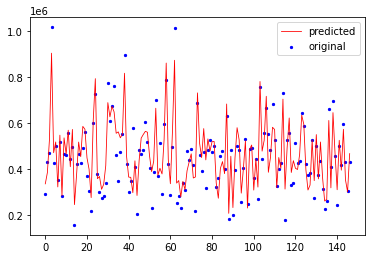

In [16]:

x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()

Cross-validation with ElasticNetCV

ElasticNetCV is a cross-validation class that can search multiple alpha values and applies the best one. We'll define the model with alphas value and fit it with xtrain and ytrain data.


In [ ]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)


In [20]:
print(model.alpha_)
print(model.intercept_)

0.0001
-2693509.6335613476


In [21]:
elastic=ElasticNet(alpha=0.0001).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("For alpha= 0.0001 ")
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

For alpha= 0.0001 
R2:0.815, MSE:4495991983.46, RMSE:67052.16


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 863990530479.6533, tolerance: 976463778.3157893
  positive)
